In [1]:
import cobra.io
model = cobra.io.read_sbml_model('Roseobacter-litoralis-strain-B14.SBML')

In [2]:
medium = model.medium

In [3]:
mediumlist = list(medium.keys())

In [4]:
mediumlist.remove('EX_glc__D_e')

In [5]:
cnsources = list()

In [6]:
for reactionname in mediumlist:
    reaction = model.reactions.get_by_id(reactionname)
    metabolite = reaction.reactants[0]
    comp = metabolite.formula
    checkcarbon = 'C' in comp
    checknitrogen = 'N' in comp
    if checkcarbon == True:
        cnsources.append(reaction.id)
    elif checknitrogen == True:
        cnsources.append(reaction.id)

In [7]:
## NEED TO SORT OUT IONS

In [8]:
#c=10
#for i in range(11):
#    with model:
#        for EX in cnsources:
#            medium[EX] = c
#            model.medium = medium
#        #print(model.medium)
#        mumax = model.optimize().objective_value
#        print('Growth rate (Exhanges C/N sources =', c,') =', mumax)
#        c = c-1

In [9]:
growthrates = list()

In [10]:
exchangelevels = list()

In [11]:
c=10
for i in range(21):
    with model:
        for EX in mediumlist:
            medium[EX] = c
            model.medium = medium
        #print(model.medium)
        mumax = model.optimize().objective_value
        #print('Growth rate (Exhanges ALL\glc =', c,') =', mumax)
        growthrates.append(mumax)
        exchangelevels.append(c)
        c = c-0.5

In [12]:
import matplotlib.pyplot as plt

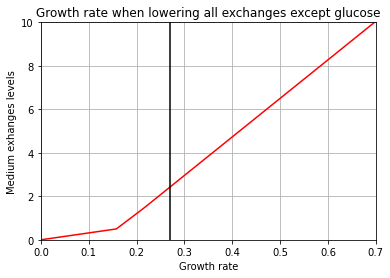

In [13]:
plt.plot(growthrates,exchangelevels,c='r',label='Growth rate')
plt.ylabel('Medium exhanges levels')
plt.xlabel('Growth rate')
plt.axvline(0.27,c='k',label='Wanted growth rate')
plt.grid(b=True)
plt.xlim([0,0.7])
plt.ylim([0,10])
plt.title("Growth rate when lowering all exchanges except glucose")
plt.show()

In [14]:
for EX in mediumlist:
    medium[EX] = 2.5
    model.medium = medium

In [15]:
for EX in mediumlist:
    medium = model.medium
    mumax = model.optimize().objective_value
    with model:
        medium[EX] = 10
        model.medium = medium
        mumaxchanged = model.optimize().objective_value
        #print('Changed', EX,'growthrate =', mumax)
    if mumaxchanged != mumax:
        print('Changed', EX,'   old growthrate =',mumax,'    new growthrate =', mumaxchanged)

Changed EX_fe3_e    old growthrate = 0.2739712587212505     new growthrate = 0.29887773678682067
Changed EX_o2_e    old growthrate = 0.27397125872125166     new growthrate = 0.6656621778179113


In [16]:
# It is seen that the reason for the decline in growth rate when lowering all other components than glucose in the medium i o2.
# In this case o2 i therefore the limiting factor.

In [17]:
model.medium

{'EX_glc__D_e': 10.0,
 'EX_h2o_e': 2.5,
 'EX_h_e': 2.5,
 'EX_leu__L_e': 2.5,
 'EX_ala__L_e': 2.5,
 'EX_cl_e': 2.5,
 'EX_pi_e': 2.5,
 'EX_adn_e': 2.5,
 'EX_nh4_e': 2.5,
 'EX_gly_e': 2.5,
 'EX_thr__L_e': 2.5,
 'EX_arg__L_e': 2.5,
 'EX_fe3_e': 2.5,
 'EX_lys__L_e': 2.5,
 'EX_asp__L_e': 2.5,
 'EX_aso3_e': 2.5,
 'EX_k_e': 2.5,
 'EX_pro__L_e': 2.5,
 'EX_ca2_e': 2.5,
 'EX_mg2_e': 2.5,
 'EX_mn2_e': 2.5,
 'EX_cobalt2_e': 2.5,
 'EX_zn2_e': 2.5,
 'EX_cu2_e': 2.5,
 'EX_o2_e': 2.5,
 'EX_glu__L_e': 2.5,
 'EX_fe2_e': 2.5,
 'EX_gsn_e': 2.5,
 'EX_h2s_e': 2.5,
 'EX_pheme_e': 2.5,
 'EX_his__L_e': 2.5,
 'EX_hxan_e': 2.5,
 'EX_ile__L_e': 2.5,
 'EX_met__L_e': 2.5,
 'EX_mobd_e': 2.5,
 'EX_uri_e': 2.5,
 'EX_so4_e': 2.5,
 'EX_val__L_e': 2.5,
 'EX_thm_e': 2.5}

In [20]:
with model:
    medium = model.medium
    medium['EX_o2_e']=0
    model.medium = medium
    mu = model.optimize().objective_value
    print(mu)

0.1400396170662323


In [ ]:
#It can grow anaerobically